## MIE1624 - Course Project (Group 4)

### Table of Content

1. Exploratory Data Analysis

2. Data Cleaning

3. Model Implementation

 - 3.1.1 Support Vector Machine
 
 - 3.1.2 Random Forest
 
 - 3.1.3 Naive Bayes
 
 - 3.1.4 Extra-Tree Regressor
 
 - 3.1.5 Light GBM
 
 - 3.1.6 Multilayer Perceptron
 
 - 3.1.7 XGBoost
 
 - 3.1.8 Ordinal Logistic Regression
 
 - 3.1.9 Linear Regression

In [35]:
#Import necessary libraries
import pandas as pd
import numpy as np
import math

#Data cleaning
import re
from html.parser import HTMLParser
import nltk
import unicodedata
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
try:
    from xgboost import XGBClassifier, XGBRegressor
except:
    !pip install xgboost
    from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import RidgeCV, Lasso, Ridge

#Plotting
import seaborn as sns
sns.set_palette(sns.color_palette("Paired")) ###Set2, hls 8,..... 
import matplotlib.pyplot as plt
from collections import Counter 
from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
time: 138 ms (started: 2021-04-04 11:34:22 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
#Load data
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

# 1. Exploratory Data Analysis

Text(0.5, 0, 'Category')

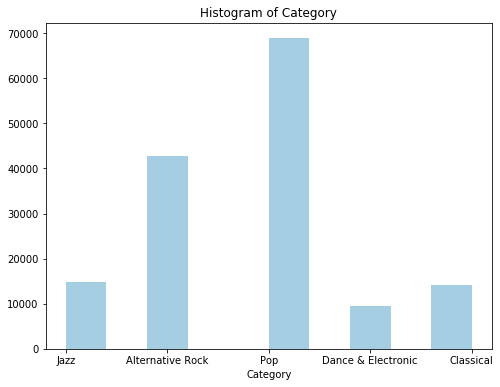

In [ ]:
#hstogram of the cagetory
plt.figure(figsize=(8,6))
plt.hist(df1['category'])
plt.title('Histogram of Category')
plt.xlabel('Category')

Text(0.5, 1.0, 'Category distribution')

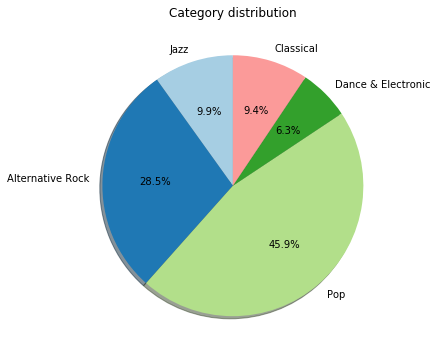

In [ ]:
plt.figure(figsize=(8,6))
cate = df1['category'].dropna().tolist()
count = Counter(cate)
plt.pie(count.values(), labels=count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

#plt.tight_layout()
plt.title('Category distribution')

Text(0.5, 1.0, 'Category distribution')

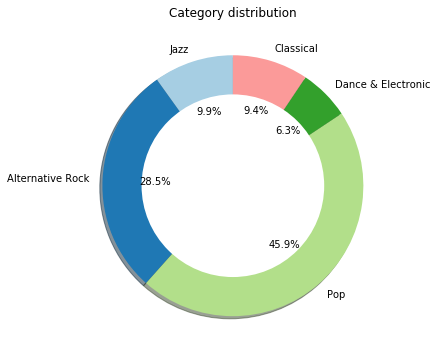

In [ ]:
#######same as above, just different visualization style

plt.figure(figsize=(8,6))
cate = df1['category'].dropna().tolist()
count = Counter(cate)
plt.pie(count.values(), labels=count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
#plt.tight_layout()
plt.title('Category distribution')

Text(0.5, 0, 'Overall')

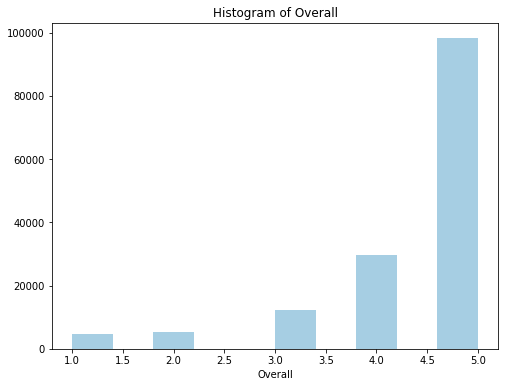

In [ ]:
#####hstogram of the overall
plt.figure(figsize=(8,6))
plt.hist(df1['overall'])
plt.title('Histogram of Overall')
plt.xlabel('Overall')

Text(0.5, 1.0, 'Overall Rating distribution')

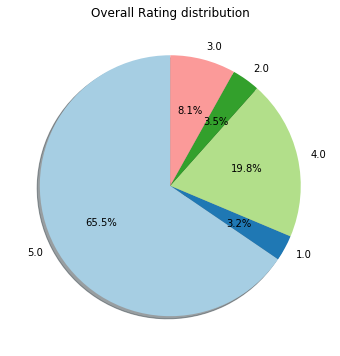

In [ ]:
plt.figure(figsize=(8,6))
cate = df1['overall'].dropna().tolist()
count = Counter(cate)
plt.pie(count.values(), labels=count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

#plt.tight_layout()
plt.title('Overall Rating distribution')

Text(0.5, 1.0, 'Overall Rating distribution')

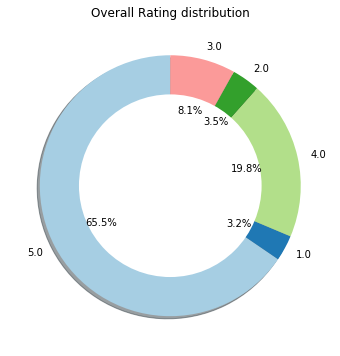

In [ ]:
#######same as above, just different visualization style

plt.figure(figsize=(8,6))
cate = df1['overall'].dropna().tolist()
count = Counter(cate)
plt.pie(count.values(), labels=count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
#plt.tight_layout()
plt.title('Overall Rating distribution')

Majority of rating falls in 5.0. We can see people tend to give high rating to the musics, and proportion of 1.0 2.0 are all very low(smaller than 5%) in the true distribution.

['Jazz', 'Alternative Rock', 'Pop', 'Dance & Electronic', 'Classical']
[5.0, 1.0, 4.0, 2.0, 3.0]


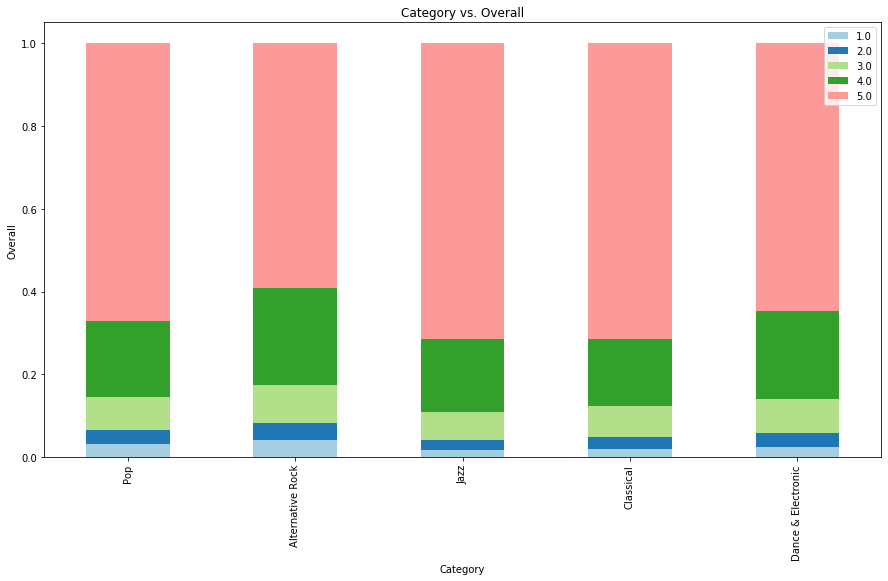

In [ ]:
print(list(df1['category'].unique()))
print(list(df1['overall'].unique()))
bucket = [1.0, 2.0, 3.0, 4.0, 5.0]
category= ['Pop', 'Alternative Rock', 'Jazz', 'Classical','Dance & Electronic']

counts_cate = {}
for i in category:
    a = df1[df1['category'] == i ]
    b = len(a)
    counts_cate[i] = {}
    for j in bucket:
        counts_cate[i][j] = len(a[a['overall'] == j ])/b  #normalize proportions
df_cate = pd.DataFrame(counts_cate).T
#colors = plt.cm.GnBu(np.linspace(0, 1, 10))
df_cate.plot(kind='bar',stacked=True,figsize=(15,8))#, color = colors)
plt.title('Category vs. Overall')
positions = (0,1, 2, 3, 4)
labels = ( 'Pop', 'Alternative Rock', 'Jazz', 'Classical','Dance & Electronic')
plt.xticks(positions, labels)
plt.xlabel('Category')
plt.ylabel('Overall')
plt.legend()
plt.show()

We can see rating among each category did not vary obviously, only alternative Rock music might have lower rating comparing to the rest of categories

### Wordcloud Plots


In [ ]:
L1 = list(random.sample(range(0, train.shape[0]), 10000)) # randomly select ID

In [ ]:
w = []
for t in train.iloc[L1, :].review_str:
    w.append(t)
w = pd.Series(w).str.cat(sep=' ')

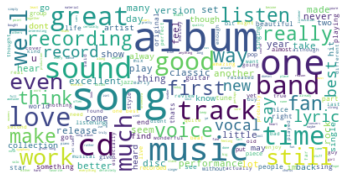

In [ ]:
wc = WordCloud(max_words=1000,margin=1,random_state=1,max_font_size=50,
               background_color = 'white').generate(w)
default_colors = wc.to_array()
#plt.figure(figsize=(12,6))
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "images (1).jpeg")))

In [ ]:
L1 = list(random.sample(range(0, train.shape[0]), 10000)) # randomly select ID
w = []
for t in train.iloc[L1, :].review_str:
    w.append(t)
w = pd.Series(w).str.cat(sep=' ')

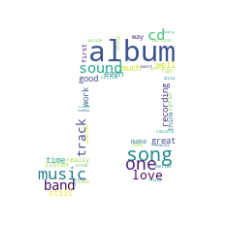

In [ ]:
wc = WordCloud(max_words=1000, mask=mask,margin=1,random_state=1,max_font_size=50,background_color = 'white').generate(w)
default_colors = wc.to_array()
#plt.figure(figsize=(12,6))
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

# 2. Data Cleaning

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train = df_train.drop(["image", "reviewHash"], axis = 1)
df_test = df_test.drop(["image", "reviewHash"], axis = 1)

df_train['reviewTime'] = pd.to_datetime(df_train['reviewTime'])
df_test['reviewTime'] = pd.to_datetime(df_test['reviewTime'])

df_train = df_train.dropna().reset_index()
# df_test = df_test.dropna().reset_index()

df_test['reviewText'] = df_test['reviewText'].replace(np.nan,'no comment')
df_test['summary'] = df_test['summary'].replace(np.nan,'no comment')

##### reviewText
# Remove all the punctuations
df_train['reviewText'] = df_train['reviewText'].str.replace('[^\w\s]','')
df_test['reviewText'] = df_test['reviewText'].str.replace('[^\w\s]','')

# Lowecase
df_train['reviewText'] = df_train['reviewText'].str.lower()
df_test['reviewText'] = df_test['reviewText'].str.lower()

# Number
df_train['reviewText'] = df_train['reviewText'].str.replace('[0-9]','')
df_test['reviewText'] = df_test['reviewText'].str.replace('[0-9]','')

##### summary
# Remove all the punctuations
df_train['summary'] = df_train['summary'].str.replace('[^\w\s]','')
df_test['summary'] = df_test['summary'].str.replace('[^\w\s]','')

# Lowecase
df_train['summary'] = df_train['summary'].str.lower()
df_test['summary'] = df_test['summary'].str.lower()

# # Number
# df_train['summary'] = df_train['summary'].str.replace('[0-9]','')
# df_test['summary'] = df_test['summary'].str.replace('[0-9]','')


##### Training set
#stop words
stop = stopwords.words('english')
#firstly tokenize before dropping the stop word
df_train['reviewText']  = df_train['reviewText'].apply(word_tokenize)
#Remove stop words
df_train['reviewText']  = df_train['reviewText'].apply(lambda x: [word for word in x if word not in stop])
#lemmatizer
lemmatizer = WordNetLemmatizer() 
df_train['reviewText'] = df_train['reviewText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



#firstly tokenize before dropping the stop word
df_train['summary']  = df_train['summary'].apply(word_tokenize)
#Remove stop words
df_train['summary']  = df_train['summary'].apply(lambda x: [word for word in x if word not in stop])
df_train['summary'] = df_train['summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



#firstly tokenize before dropping the stop word
df_test['reviewText']  = df_test['reviewText'].apply(word_tokenize)
#Remove stop words
df_test['reviewText']  = df_test['reviewText'].apply(lambda x: [word for word in x if word not in stop])
#lemmatizer
lemmatizer = WordNetLemmatizer() 
df_test['reviewText'] = df_test['reviewText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



#firstly tokenize before dropping the stop word
df_test['summary']  = df_test['summary'].apply(word_tokenize)
#Remove stop words
df_test['summary']  = df_test['summary'].apply(lambda x: [word for word in x if word not in stop])
df_test['summary'] = df_test['summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


# Fill na with "no comment"
df_test['summary'] = df_test['summary'].fillna('no comment')

In [ ]:
df_test['reviewText'][5]

['best',
 'record',
 'since',
 'boy',
 'girlsit',
 'hard',
 'find',
 'good',
 'music',
 'great',
 'highly',
 'recommend',
 'record']

### Encode

In [ ]:
# Train csv
df_train['category'].value_counts()

train_encode = {'Pop':0,'Alternative Rock':1,'Jazz':2,'Classical':3,'Dance & Electronic':4}

df_train['category'] = df_train['category'].map(train_encode)


# Test csv
df_test['category'].value_counts()

test_encode = {'Pop':0,'Alternative Rock':1,'Jazz':2,'Classical':3,'Dance & Electronic':4}

df_test['category'] = df_test['category'].map(test_encode)

#price
df_train1 = df_train[df_train['price'] != '.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div']

df_train2 =  df_train1[df_train1['price'] != '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab']

df_train2['price'] = df_train2['price'].str.replace('$','').astype(float)

mean_pop = df_train2[df_train2['category'] == 0]['price'].mean()
mean_alt = df_train2[df_train2['category'] == 1]['price'].mean()
mean_j = df_train2[df_train2['category'] == 2]['price'].mean()
mean_class = df_train2[df_train2['category'] == 3]['price'].mean()
mean_dac = df_train2[df_train2['category'] == 4]['price'].mean()




error1 = df_train[df_train['price'] == '.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div']
error2 = df_train[df_train['price'] == '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab']
error = pd.concat([error1,error2])
for i in (error.index):
    if error['category'][i] == 0:
        error['price'][i] = mean_pop
    if error['category'][i] == 1:
        error['price'][i] = mean_alt
    if error['category'][i] == 2:
        error['price'][i] = mean_j
    if error['category'][i] == 3:
        error['price'][i] = mean_class
    if error['category'][i] == 4:
        error['price'][i] = mean_dac

######
df_train = pd.concat([df_train2,error]).sort_index()


df_test1 = df_test[df_test['price'] != '.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div']

df_test2 = df_test1[df_test1['price'] != '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab']

df_test2['price'] = df_test2['price'].str.replace('$','').astype(float)

mean_pop2 = df_test2[df_test2['category'] == 0]['price'].mean()
mean_alt2 = df_test2[df_test2['category'] == 1]['price'].mean()
mean_j2 = df_test2[df_test2['category'] == 2]['price'].mean()
mean_class2 = df_test2[df_test2['category'] == 3]['price'].mean()
mean_dac2 = df_test2[df_test2['category'] == 4]['price'].mean()


error3 = df_test[df_test['price'] == '.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div']
error4 = df_test[df_test['price'] == '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab']

error5 = pd.concat([error3,error4])
error5
for i in (error5.index):
    if error5['category'][i] == 1:
        error5['price'][i] = mean_pop2
    if error5['category'][i] == 2:
        error5['price'][i] = mean_alt2
    if error5['category'][i] == 3:
        error5['price'][i] = mean_j2
    if error5['category'][i] == 4:
        error5['price'][i] = mean_class2
    if error5['category'][i] == 5:
        error5['price'][i] = mean_dac2
######
df_test = pd.concat([df_test2,error5]).sort_index()




In [ ]:
df_train['reviewText']
separator = ' '
text_train = []
for i in range(len(df_train['reviewText'])):
    text_train.append(separator.join(df_train['reviewText'].iloc[i]))

df_train['reviewText'] = text_train

In [ ]:
df_train['summary']
separator = ' '
text_train = []
for i in range(len(df_train['summary'])):
    text_train.append(separator.join(df_train['summary'].iloc[i]))

df_train['summary'] = text_train

In [ ]:
df_train.head()

,index,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID
0,0,5.0,2014-08-26,u92990698,contemporary jazz soul performer who made twod...,classique,1409011200,2,8.4,p23649501
1,1,5.0,2003-05-11,u36200649,good idea put pop orchestral music matrix relo...,exceeded expectation album rawks,1052611200,1,10.98,p58458313
2,2,5.0,2017-12-05,u10721702,great collection carole king song,musthave carole king fan,1512432000,0,5.99,p97027626
3,3,5.0,2013-09-24,u86003775,album brilliant piece jazz fusion start finish...,master piece,1379980800,2,14.64,p43167086
4,4,5.0,2015-01-14,u25672859,waited long time dvd released watching yearold...,especially like concert video,1421193600,1,9.92,p94494236


# 3. Model Implementation

## 3.1. Support Vector Machine

In [ ]:
train = df_train
train['review_str'] = train['reviewText'].str.join(' ')
train['summary'] = train['summary'].str.join(' ')
train['comb'] = train['review_str'] + train['summary']
y = train['overall'].astype(int)
X = train['comb']
#X = train.drop(columns = ['index', 'summary','overall','reviewTime','reviewerID','unixReviewTime','itemID', 'reviewText', 'category', 'price'],axis = 1)
#train = train.drop(coumns = ['overall','reviewTime','reviewerID','unixReviewTime','itemID'])
#train = train.drop(columns = ['category', 'price'])
#train['review_str'] = train['reviewText'].str().join(' ')
X

0         contemporary jazz soul performer who made twod...
1         good idea put pop orchestral music matrix relo...
2         great collection carole king songmusthave caro...
3         album brilliant piece jazz fusion start finish...
4         waited long time dvd released watching yearold...
                                ...                        
149944    something wesley voice make swoon little bit v...
149945    many recording verdi requiem oftenasked questi...
149946    best overall album revisionist fallout followi...
149947    believe upon time artist like enchantment coul...
149948    mokenstefs album must wan na mellow chill favo...
Name: comb, Length: 149949, dtype: object

In [ ]:
X[5]

'since ok computer radiohead lot deal anyone watched meeting people easy dvd know quite im getting say hectic time band hard beleive coming year since album came wow fan modern music would knowthis one missed radiohead fan die hard one become enamoured thsi recording calling greatest time im sre sonically deviation ordinary true marvel group pulled opening track grew mind blowing title track lull serene complacency idm world show whole new radiohead national anthem classic piece experimental punk lead listener great height excite horn fuzzy yet catchy hell bassline thom yorke made disappear string exploit similar climbing wall ok computer excels one mere grandiosity make cutw look le like frightening song child tune comparison treefingers quite possibly alluring piece music ive heard arent synthesizer guitar fed sampler played ed maniplulated thom tell insane fluctuation frequency optimistic gorgeous ballad tribal sounding drum organic lush gutiars thom yourkes vocal making sway excite

In [ ]:
#from sklearn.model_selection import StratifiedShuffleSplit
#X_train,X_test,y_train,y_test = train_test_split(train, label, test_size=0.3, random_state = 30)

In [ ]:
#train = pd.read_csv('Train_TFIDF.csv')
#label = train[['overall']]
#train = train.drop(columns = ['Unnamed: 0',	'overall','reviewTime',	'reviewerID','unixReviewTime','itemID'])
#train = train.drop(columns = ['category', 'price'])

In [ ]:
kf = StratifiedKFold(n_splits=2,random_state=42, shuffle=False)
clf = svm.LinearSVR()
kf.get_n_splits(X)
wf_vec = CountVectorizer(max_features=800)
tf = TfidfVectorizer(max_features=20000)
mse = np.zeros(2)
np_idx = 0

for train_idx, test_idx in kf.split(X, y):
    
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    
    X_train = tf.fit_transform(X_train)
    X_test = tf.transform(X_test)
    #X_train = scaler.fit_transform(X_train) #standardization after splitting to avoide early exposure of information in test set
    #X_test = scaler.transform(X_test)
    
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_test)
    pred = np.round(prediction)
    
    MSE = mean_squared_error(y_test, pred)
    
    mse[np_idx] = MSE
    
    np_idx += 1
    
    print ("Fold {}: MSE: {}".format(np_idx, round(MSE,3)))   
print ("MSE: {}({})".format(round(np.mean(mse),3),round(np.var(mse),3)))

Fold 1: MSE: 0.719
Fold 2: MSE: 0.717
MSE: 0.718(0.0)


### Hyperparameter Tunning



In [ ]:

kf.get_n_splits(X)
wf_vec = CountVectorizer(max_features=800)
tf = TfidfVectorizer(max_features=20000)

C_list = [0.1, 0.5,1, 1.5, 2]
iter_list = [100, 1000, 5000]
for c in C_list:
    print('C = ', c)
    for i in iter_list:
        print('Max_iter = ', i)
        mse = np.zeros(2)
        np_idx = 0
        for train_idx, test_idx in kf.split(X, y):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    
            X_train = tf.fit_transform(X_train)
            X_test = tf.transform(X_test)

    
            clf = svm.LinearSVR(C = c, max_iter = i)
            clf.fit(X_train, y_train)
    
            prediction = clf.predict(X_test)
            #pred = np.round(prediction)
        
            prediction_train = clf.predict(X_train)
            #pred_train = np.round(prediction_train)
    
            MSE = mean_squared_error(y_test, prediction)
            trainMSE = mean_squared_error(y_train, prediction_train)
    
            mse[np_idx] = MSE
    
            np_idx += 1
         
        
            print ("Fold {}: testing MSE: {}".format(np_idx, round(MSE,3)), 'training mse', round(trainMSE,3))  
        print ("MSE: {}({})".format(round(np.mean(mse),3),round(np.var(mse),3)))

C =  0.1
Max_iter =  100
Fold 1: testing MSE: 0.745 training mse 0.707
Fold 2: testing MSE: 0.743 training mse 0.711
MSE: 0.744(0.0)
Max_iter =  1000
Fold 1: testing MSE: 0.746 training mse 0.708
Fold 2: testing MSE: 0.743 training mse 0.711
MSE: 0.744(0.0)
Max_iter =  5000
Fold 1: testing MSE: 0.745 training mse 0.707
Fold 2: testing MSE: 0.743 training mse 0.711
MSE: 0.744(0.0)
C =  0.5
Max_iter =  100
Fold 1: testing MSE: 0.663 training mse 0.576
Fold 2: testing MSE: 0.66 training mse 0.572
MSE: 0.661(0.0)
Max_iter =  1000
Fold 1: testing MSE: 0.663 training mse 0.576
Fold 2: testing MSE: 0.659 training mse 0.572
MSE: 0.661(0.0)
Max_iter =  5000
Fold 1: testing MSE: 0.663 training mse 0.576
Fold 2: testing MSE: 0.659 training mse 0.572
MSE: 0.661(0.0)
C =  1
Max_iter =  100
Fold 1: testing MSE: 0.656 training mse 0.538
Fold 2: testing MSE: 0.655 training mse 0.533
MSE: 0.655(0.0)
Max_iter =  1000
Fold 1: testing MSE: 0.656 training mse 0.538
Fold 2: testing MSE: 0.656 training mse 0

## 3.1.2 Random Forest

In [ ]:
y = df_train['overall'].astype('int')
X = df_train.drop(['summary', 'overall','index','reviewTime','reviewerID','unixReviewTime','itemID', 'category', 
                   'price'],axis = 1)

In [ ]:
# reviewText
vectorizer_tf = TfidfVectorizer(max_features=15000, use_idf = True, smooth_idf=True, norm=None)

X_train, X_test, y_train, y_test = train_test_split(X['reviewText'], y, test_size=0.2, random_state=1, stratify=y)
X_train = vectorizer_tf.fit_transform(X_train)
X_test = vectorizer_tf.transform(X_test)

In [ ]:
# Random Forest regressor
model = RandomForestRegressor(max_depth=50, 
                              n_estimators=150,
                              min_samples_split = 20)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')

y_pred = model.predict(X_test)
print(f'Validation MSE: {mean_squared_error(y_test, y_pred)}')

Train MSE: 0.42119287132562877
Validation MSE: 0.7323515276613298


## 3.1.3 Naive Bayes

In [ ]:
y = df_train['overall'].astype('int')
X = df_train.drop(['overall','index','reviewTime','reviewerID','unixReviewTime','itemID'],axis = 1)
vectorizer = TfidfVectorizer(max_features=800)

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB(alpha=0.01)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
mse_train_list = []
mse_test_list  = []  

for train_index, val_index in skf.split(X, y):
    # Select rows
    X_train1, X_val1 = X.iloc[train_index], X.iloc[val_index]
    y_train1, y_val1 = y.iloc[train_index], y.iloc[val_index]
    
    text_train = vectorizer.fit_transform(X_train1['reviewText']).toarray()
    sum_train = vectorizer.fit_transform(X_train1['summary']).toarray()
    text_val = vectorizer.transform(X_val1['reviewText']).toarray()
    sum_val = vectorizer.transform(X_val1['summary']).toarray()
    
    text_train = pd.DataFrame(text_train)
    sum_train = pd.DataFrame(sum_train)
    word_train = pd.concat([text_train,sum_train],axis = 1)
    text_test = pd.DataFrame(text_val)
    sum_test = pd.DataFrame(sum_val)
    word_test = pd.concat([text_test,sum_test],axis = 1)
    
    # Fit model and compute mse for training and testing set
    nb = multinomial_nb.fit(word_train, y_train1)
    y_pred_train = nb.predict(word_train)
    mse_train = mean_squared_error(y_train1,y_pred_train)
    y_pred_test = nb.predict(word_test)
    mse_test = mean_squared_error(y_val1,y_pred_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

In [ ]:
print('Train MSE for Navie Bayes', np.mean(mse_train_list))
print('Test MSE for Navie Bayes', np.mean(mse_test_list))

Train MSE for Navie Bayes 0.9565518915305955
Test MSE for Navie Bayes 1.1034151991108532


## 3.1.4 Extra-Tree Regressor

In [ ]:
y = df_train['overall'].astype('int')
X = df_train.drop(['summary', 'overall','index','reviewTime','reviewerID','unixReviewTime','itemID', 'category', 
                   'price'],axis = 1)

In [ ]:
# reviewText
vectorizer_tf = TfidfVectorizer(max_features=1200, use_idf = True, smooth_idf=True, norm=None)

X_train, X_test, y_train, y_test = train_test_split(X['reviewText'], y, test_size=0.2, random_state=1, stratify=y)
X_train = vectorizer_tf.fit_transform(X_train)
X_test = vectorizer_tf.transform(X_test)

In [ ]:
cv_params = {   
    'n_estimators':range(20,81,10),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt','log2'],
    'max_depth': range(5, 20, 3),
}

ExtraTree_hp =  ExtraTreesClassifier()
log_ExtraTree = GridSearchCV(ExtraTree_hp, cv_params ,cv=5)
log_ExtraTree.fit(X_train,y_train)
ExtraTree_gridsearch = log_ExtraTree.best_estimator_#Find the best model with the optimal parameters
ExtraTree_gridsearch.fit(X_train,y_train)#Train the best model with training dataset
train_accuracy = accuracy_score(y_train, ExtraTree_gridsearch.predict(X_train))#Determine the training accuracy of the best model
test_accuracy = accuracy_score(y_test, ExtraTree_gridsearch.predict(X_test))#Determine the testing accuracy of the best model
print("tuned hpyerparameters of best parameters) ",log_ExtraTree.best_params_)
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

y_pred = log_ExtraTree.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

tuned hpyerparameters of best parameters)  {'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 40}
train accuracy: 0.6708792170658309
test accuracy: 0.6547849283094365
MSE: 1.3425808602867622


In [ ]:
#Use the best parameters we got from above
ExtraTree_hp =  ExtraTreesClassifier(criterion='gini', max_depth=17, max_features='sqrt', n_estimators=40)
log_ExtraTree = GridSearchCV(ExtraTree_hp, cv_params ,cv=5)
log_ExtraTree.fit(X_train,y_train)
ExtraTree_gridsearch = log_ExtraTree.best_estimator_#Find the best model with the optimal parameters
ExtraTree_gridsearch.fit(X_train,y_train)#Train the best model with training dataset
train_accuracy = accuracy_score(y_train, ExtraTree_gridsearch.predict(X_train))#Determine the training accuracy of the best model
test_accuracy = accuracy_score(y_test, ExtraTree_gridsearch.predict(X_test))#Determine the testing accuracy of the best model
print("tuned hpyerparameters of best parameters) ",log_ExtraTree.best_params_)
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

y_pred_train = log_ExtraTree.predict(X_train)
print(f'MSE_train: {mean_squared_error(y_train, y_pred_train)}')
y_pred_test = log_ExtraTree.predict(X_test)
print(f'MSE_test: {mean_squared_error(y_test, y_pred_test)}')

tuned hpyerparameters of best parameters)  {'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 40}
train accuracy: 0.6709208979734743
test accuracy: 0.6549516505501833
MSE_train: 1.3039121699914138
MSE_test: 1.341513837945982


## 3.1.5 Light GBM

In [ ]:
param = {'metric': 'mse'}
train_data = lgb.Dataset(X_train, label = y_train)
validation_data = lgb.Dataset(X_val, label = y_val)

bst = lgb.train(params=param, train_set=train_data, num_boost_round = 500, valid_sets=[train_data, validation_data],
                early_stopping_rounds = 5)

predict = bst.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)

[1]	training's l2: 0.967479	valid_1's l2: 0.965361
Training until validation scores don't improve for 5 rounds.
[2]	training's l2: 0.943139	valid_1's l2: 0.942912
[3]	training's l2: 0.922386	valid_1's l2: 0.923332
[4]	training's l2: 0.903797	valid_1's l2: 0.90583
[5]	training's l2: 0.886168	valid_1's l2: 0.88939
[6]	training's l2: 0.870653	valid_1's l2: 0.874848
[7]	training's l2: 0.857198	valid_1's l2: 0.862541
[8]	training's l2: 0.843773	valid_1's l2: 0.85016
[9]	training's l2: 0.830662	valid_1's l2: 0.838119
[10]	training's l2: 0.816784	valid_1's l2: 0.825211
[11]	training's l2: 0.804203	valid_1's l2: 0.813853
[12]	training's l2: 0.794632	valid_1's l2: 0.805362
[13]	training's l2: 0.784809	valid_1's l2: 0.796303
[14]	training's l2: 0.776474	valid_1's l2: 0.788907
[15]	training's l2: 0.76892	valid_1's l2: 0.78274
[16]	training's l2: 0.761229	valid_1's l2: 0.775507
[17]	training's l2: 0.7537	valid_1's l2: 0.769158
[18]	training's l2: 0.745919	valid_1's l2: 0.762229
[19]	training's l2:

0.5872202288931028

## 3.1.6 Multilayer Perceptron

In [2]:
# For timing each cell
!pip install ipython-autotime
%load_ext autotime

time: 171 µs (started: 2021-04-04 11:02:55 +00:00)


In [3]:
# Load training data
train_df = pd.read_csv('train.csv')
train_df.drop(columns=['reviewTime', 'unixReviewTime', 'reviewHash', 'image'], inplace=True)

time: 1.82 s (started: 2021-04-04 11:02:56 +00:00)


In [4]:
# Load test data
test_df = pd.read_csv('test.csv')
test_df.drop(columns=['reviewTime', 'unixReviewTime', 'reviewHash', 'image'], inplace=True)

time: 207 ms (started: 2021-04-04 11:02:58 +00:00)


In [5]:
# Using NLTK's list of stopwords
stopword_list = stopwords.words('english')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

time: 4.59 ms (started: 2021-04-04 11:02:59 +00:00)


In [6]:
# Change column data types
train_df.reviewText = train_df.reviewText.astype('string')
train_df.summary = train_df.summary.astype('string')
train_df.price = train_df.price.astype('string')
train_df.overall = train_df.overall.astype('float')

test_df.reviewText = test_df.reviewText.astype('string')
test_df.summary = test_df.summary.astype('string')
test_df.price = test_df.price.astype('string')

time: 189 ms (started: 2021-04-04 11:03:00 +00:00)


In [7]:
# Create function for cleaning the tweets column
def clean_text(s, remove_numbers):
    # Make sure all characters are in lowercase
    try:
        s = s.lower()
    except:
        s = ''
    # Remove HTML tags and attributes from the string
    # s = BeautifulSoup(s,'lxml').get_text() # takes longer
    html_tags = re.compile('<.*?>')
    s = re.sub(html_tags, '', s)
    # Replace HTML character codes with ASCII equivalent
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('utf-8')
    # Remove URLs
    s = re.sub(r'http\S+', '', s)
    # Remove mentions
    s = re.sub("@[A-Za-z0-9]+", "", s)
    # Remove new line and line breaks characters
    s = s.replace('b"', '').replace("b'", '').replace('\n', '').replace('\\n', '').replace('\\n\\n', '').replace('\t', '')
    if remove_numbers == True:
        # Replace non-letters and extra white spaces with one space
        non_letters = re.compile('[^a-zA-Z]+')
        s = non_letters.sub(' ', s)
    else:
        s = re.sub(r'\s+', ' ', s)
        # Remove punctuations
        s = s.translate(str.maketrans('', '', string.punctuation))
    # Remove retweet letters
    s = re.sub(r'\brt\b', '', s)
    # Lemmatization
    s = lemmatizer.lemmatize(s)
    # Remove stop words
    text_tokens = word_tokenize(s)
    s = [word for word in text_tokens if not word in stopword_list]
    # Remove words with only 1 letter
    if remove_numbers == True:
        s = [i for i in s if len(i) > 1]
    if not s:
        return []
    return s

time: 27.4 ms (started: 2021-04-04 11:03:03 +00:00)


In [8]:
# Clean price column
def clean_price(s):
    s = s.replace('$', '')
    try:
        s = float(s)
    except:
        s = np.nan
    if s == '':
        s = np.nan
    return s

time: 15.1 ms (started: 2021-04-04 11:03:06 +00:00)


In [9]:
# Clean train set text features
train_df.reviewText = train_df.reviewText.apply(clean_text, remove_numbers = True)
train_df.reviewText = train_df.reviewText.apply(' '.join)
train_df.summary = train_df.summary.apply(clean_text, remove_numbers = True)
train_df.summary = train_df.summary.apply(' '.join)
train_df.price = train_df.price.apply(clean_price)
pd.set_option('display.max_colwidth', None)
# train_df.head()

time: 2min 31s (started: 2021-04-04 11:03:08 +00:00)


In [10]:
# Clean test set text features
#test_df["reviewText_ori"] = test_df.reviewText.apply(clean_text, remove_numbers=False)
#test_df["reviewText_ori"] = test_df["reviewText_ori"].apply(' '.join)
test_df.reviewText = test_df.reviewText.apply(clean_text, remove_numbers=True)
test_df.reviewText = test_df.reviewText.apply(' '.join)

#test_df["summary_ori"] = test_df.summary.apply(clean_text, remove_numbers=False)
#test_df["summary_ori"] = test_df["summary_ori"].apply(' '.join)
test_df.summary = test_df.summary.apply(clean_text, remove_numbers=True)
test_df.summary = test_df.summary.apply(' '.join)

test_df.price = test_df.price.apply(clean_price)
pd.set_option('display.max_colwidth', None)
# test_df.head()

time: 19.6 s (started: 2021-04-04 11:05:41 +00:00)


In [11]:
# Create ID pairs
train_df['ID'] = train_df[['reviewerID', 'itemID']].agg('-'.join, axis=1)
train_df.drop(columns=['reviewerID', 'itemID'], inplace=True)
train_df.set_index('ID', inplace=True)
# train_df.head()

time: 7.71 s (started: 2021-04-04 11:06:41 +00:00)


In [12]:
# Create ID pairs
test_df['ID'] = test_df[['reviewerID', 'itemID']].agg('-'.join, axis=1)
test_df.drop(columns=['reviewerID', 'itemID'], inplace=True)
test_df.set_index('ID', inplace=True)
# test_df.head()

time: 1.01 s (started: 2021-04-04 11:06:48 +00:00)


Join "reviewText" and "summary"

In [13]:
# Prepare the training set by joining "reviewText" and "summary"
train_copy = train_df.copy(deep=True)
train_copy["Texts"] = train_copy["reviewText"] + " " + train_copy["summary"] 
train_copy

,overall,reviewText,summary,category,price,Texts
ID,,,,,,
u92990698-p23649501,5.0,contemporary jazz soul performer made two decade career effortlessly composing interpreting smooth sensual music downing one consummate artists capable singing tax code transforming baby generating smash practically brainer collection classique allows imagine soul hits musical titans david ruffin barry white originals well present compositions long time collaborator rex rideout top bottom classique embodies come expect years mr downing buttery baritone miraculously unaffected debilitating bout muscle disorder polymyositis poured billowy ballads mellow mid tempos soothe seduce trademark tender touch pulls listener ride intro breathless invitation paradise stop valentine pledging devotion affection beloved undulating time tic toc plea another chance ignite flames midst busy lives obligations smoldering think wants pick long ago love left one inspired cuts mid tempo something special shimmers sweetness newfound attraction could resist man willing take orders implores love suggestions song stylist sherrida whatever menu serve baby coos soup ladies reason reinterpreted tracks starts stumble bit baby real brings back doo wop sugary sweetness originals brought song david ruffin hit statue fool still emotive original version gon na love little baby sluggish sexy downfall beyond classique vary textures tones much effort tonight provides overall effect day chocolate binge sweetness welcomed first starts become cloying redundant end full bodied flavorful tonight mean fans overlook outright disregard classique mr downing still demonstrates spades endured since prince sophisticated soul winning formula still formula tweaking ingredients awhile lessen quality timelessness results,classique,Jazz,8.40,contemporary jazz soul performer made two decade career effortlessly composing interpreting smooth sensual music downing one consummate artists capable singing tax code transforming baby generating smash practically brainer collection classique allows imagine soul hits musical titans david ruffin barry white originals well present compositions long time collaborator rex rideout top bottom classique embodies come expect years mr downing buttery baritone miraculously unaffected debilitating bout muscle disorder polymyositis poured billowy ballads mellow mid tempos soothe seduce trademark tender touch pulls listener ride intro breathless invitation paradise stop valentine pledging devotion affection beloved undulating time tic toc plea another chance ignite flames midst busy lives obligations smoldering think wants pick long ago love left one inspired cuts mid tempo something special shimmers sweetness newfound attraction could resist man willing take orders implores love suggestions song stylist sherrida whatever menu serve baby coos soup ladies reason reinterpreted tracks starts stumble bit baby real brings back doo wop sugary sweetness originals brought song david ruffin hit statue fool still emotive original version gon na love little baby sluggish sexy downfall beyond classique vary textures tones much effort tonight provides overall effect day chocolate binge sweetness welcomed first starts become cloying redundant end full bodied flavorful tonight mean fans overlook outright disregard classique mr downing still demonstrates spades endured since prince sophisticated soul winning formula still formula tweaking ingredients awhile lessen quality timelessness results classique
u36200649-p58458313,5.0,good idea put pop orchestral music matrix reloaded onto one disc personally prefer nd disc orchestral main themes enhanced plus new ones sound positively earth shattered course love song sleeping awake great tune stick mind long time come album whetted appetite see movie hail matrix reloaded,exceeded expectations album rawks,Alternative Rock,10.98,good idea put pop orchestral music matrix reloaded onto one disc personally prefer nd disc orchestral main themes enhanced p

time: 258 ms (started: 2021-04-04 11:06:50 +00:00)


In [14]:
# Prepare the test set in the same way
test_df["Texts"] = test_df["reviewText"] + " " + test_df["summary"] 
# test_df["Texts_ori"] = test_df["reviewText_ori"] + " " + test_df["summary_ori"] 
test_df

,reviewText,summary,category,price,Texts
ID,,,,,
u04140621-p65721979,ok,five stars,Pop,31.20,ok five stars
u74766187-p87809670,sets alone worth purchase cost everything else gravy,buy set monk,Jazz,34.04,sets alone worth purchase cost everything else gravy buy set monk
u31689638-p52702240,mary blige someone people know first appeared classic debut whats mary combined gritty soul hip hop beats flowed effortlessly voice almost seemed born sing songs say puffy hell job follow life think puffy lazy sampling neccesary anyways back mary everyone pretty much knows half cd got much radio play sexy reminisce funky real love jazzy love limit remind chaka rufus remake sweet thing standouts love anything also good tracks basically every song excellent mary put heart signature street swagger sweet singing,mary excellent debut classic,Pop,1.72,mary blige someone people know first appeared classic debut whats mary combined gritty soul hip hop beats flowed effortlessly voice almost seemed born sing songs say puffy hell job follow life think puffy lazy sampling neccesary anyways back mary everyone pretty much knows half cd got much radio play sexy reminisce funky real love jazzy love limit remind chaka rufus remake sweet thing standouts love anything also good tracks basically every song excellent mary put heart signature street swagger sweet singing mary excellent debut classic
u35613516-p01314374,good satch album,four stars,Pop,10.99,good satch album four stars
u93320378-p84396269,well hundreds christmas anthologies one best ever mix classic songs obscure tunes rock hits favorites recognize make say great mix big ones go get many compilations good bang buck,cd lives name,Alternative Rock,7.98,well hundreds christmas anthologies one best ever mix classic songs obscure tunes rock hits favorites recognize make say great mix big ones go get many compilations good bang buck cd lives name
...,...,...,...,...,...
u16765812-p17291597,goodness christian scott simply taken breath away brings music nothing short miracle love magical bends stretches lends jazz genre music whole matter get listening scott innovation finest looking forward hearing great artist,blown away,Jazz,11.87,goodness christian scott simply taken breath away brings music nothing short miracle love magical bends stretches lends jazz genre music whole matter get listening scott innovation finest looking forward hearing great artist blown away
u04428712-p73630774,congratulations clan xymox butchered classic songs written well known artists butcher songs someone else,take shelter covers abysmal,Pop,16.99,congratulations clan xymox butchered classic songs written well known artists butcher songs someone else take shelter covers abysmal
u39251384-p58275451,happy cher videos dvd remember cause child video glad fair cher put together fans lord knows going miss stage,glad,Pop,49.95,happy cher videos dvd remember cause child video glad fair cher put together fans lord knows going miss stage glad


time: 62.2 ms (started: 2021-04-04 11:06:50 +00:00)


In [15]:
X = train_copy.Texts # note that the features here are Texts
y = train_copy.overall

time: 1.18 ms (started: 2021-04-04 11:06:51 +00:00)


Class=5, n=98213 (65.475%)
Class=1, n=4772 (3.181%)
Class=4, n=29648 (19.765%)
Class=2, n=5213 (3.475%)
Class=3, n=12154 (8.103%)


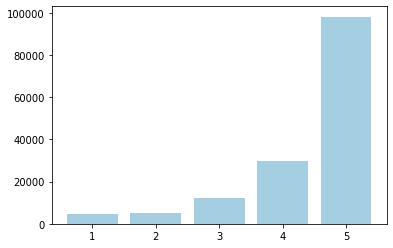

time: 219 ms (started: 2021-04-04 11:06:53 +00:00)


In [16]:
from collections import Counter

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [17]:
# Vectorize X features
tfidf = TfidfVectorizer(max_features=15000, analyzer='word', token_pattern=r'\w+',
                        stop_words='english', ngram_range=(1, 2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
# eval_set = [(X_test, y_test)]

time: 47.3 s (started: 2021-04-04 11:07:05 +00:00)


In [18]:
# MLP Regressor
mlp = MLPRegressor(activation='relu',
                   random_state=1,
                   alpha=0.5,
                   learning_rate_init=0.001,
                   learning_rate='adaptive',
                   max_iter=5000,
                   batch_size=1024,
                   early_stopping=True,
                   validation_fraction=0.1).fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')

y_pred = mlp.predict(X_test)
print(f'Validation MSE: {mean_squared_error(y_test, y_pred)}')

Train MSE: 0.3914982000639157
Validation MSE: 0.49509112849562015
time: 5min 6s (started: 2021-04-04 11:07:52 +00:00)


In [19]:
label_count = y_test.value_counts().rename_axis('unique_values').reset_index(name='counts')
label_count.set_index('unique_values', inplace=True)

y_pred = np.round(y_pred) 
y_pred = np.clip(y_pred, 1.0, 5.0) 
y_pred = pd.DataFrame({'pred': y_pred}, index=y_test.index)
pred_count = y_pred.value_counts().rename_axis('unique_values').reset_index(name='counts')
pred_count.set_index('unique_values', inplace=True)

output_df = pd.concat([label_count, pred_count], axis=1)
output_df.columns = ['label_count', 'pred_count']
output_df

,label_count,pred_count
unique_values,,
5.0,19643,18592
4.0,5929,8485
3.0,2431,2037
2.0,1043,656
1.0,954,230


time: 36.4 ms (started: 2021-04-04 11:13:00 +00:00)


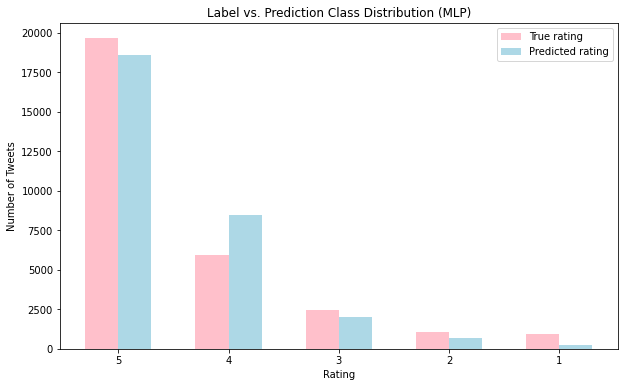

time: 211 ms (started: 2021-04-04 11:13:00 +00:00)


In [20]:
plt.figure(figsize=(10, 6))
width = 1.5
index = np.arange(5)

true_2plot = output_df["label_count"]
pred_2plot = output_df["pred_count"]

plt.bar(index - width/10, true_2plot, label="True rating", width=width/5, color="pink")
plt.bar(index + width/10, pred_2plot, label="Predicted rating", width=width/5, color="lightblue")
plt.title("Label vs. Prediction Class Distribution (MLP)")
plt.xticks(index, labels=["5", "4", "3", "2", "1"])
plt.xlabel("Rating")
plt.ylabel("Number of Tweets")
plt.legend()
plt.show()

### Test

In [21]:
# Prepare test pairs
true_test_X = tfidf.transform(test_df.Texts)

true_pred = mlp.predict(true_test_X)
true_pred = np.clip(true_pred, 1.0, 5.0)
true_pred

array([3.94087462, 4.64006894, 4.53276736, ..., 4.86534993, 4.4256249 ,
       4.41598119])

time: 2.73 s (started: 2021-04-04 11:13:00 +00:00)


In [22]:
res = {'userID-itemID': test_df.index, 'prediction': true_pred}
res = pd.DataFrame(res)
res.set_index('userID-itemID', inplace=True)

for i in range(20000):
    if "five stars" in test_df["Texts"][i]:
        res["prediction"][i] = 5.0;
    elif "four stars" in test_df["Texts"][i]:
        res["prediction"][i] = 4.0;
    elif "three stars" in test_df["Texts"][i]:
        res["prediction"][i] = 3.0;
    elif "two stars" in test_df["Texts"][i]:
        res["prediction"][i] = 2.0;
    elif "one star" in test_df["Texts"][i]:
        res["prediction"][i] = 1.0;

# res.to_csv('MLP_prediction.csv')
res.head()

,prediction
userID-itemID,
u04140621-p65721979,5.000000
u74766187-p87809670,4.640069
u31689638-p52702240,4.532767
u35613516-p01314374,4.000000
u93320378-p84396269,4.639019


time: 807 ms (started: 2021-04-04 11:13:03 +00:00)


## 3.1.7 XGBoost

Reusing the datasets and defined variables in the section "MLP".

In [ ]:
# XGB regressor
model = XGBRegressor(learning_rate=0.3,
                     n_estimator=900,
                     max_depth=50,
                     min_child_weight=100,
                     gamma=0.5,
                     reg_lambda=50.0,
                     objective='reg:squarederror',
                     colsample_bytree=1.0,
                     colsample_bylevel=1.0,
                     subsample=1.0,
                     seed=1,
                     n_jobs=-1,
                     early_stopping_rounds=5).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')

y_pred = model.predict(X_test)
# y_pred = np.round(y_pred, 0)
print(f'Validation MSE: {mean_squared_error(y_test, y_pred)}')

Train MSE: 0.3867210682075521
Validation MSE: 0.6186515499714811
time: 11min 47s (started: 2021-03-27 21:09:59 +00:00)


## 3.1.8 Ordinal Logistic Regression

In [ ]:
def ordinal_LogisticRegression(X_train, y_train, X_test, y_test, nclass, c_value, penalty):
    lr_model = LogisticRegression(C=c_value, solver="saga", multi_class="ovr", penalty=penalty)
    y_train_binary = y_train.copy()
    y_test_binary = y_test.copy()

    proba_binary_train = np.zeros((y_train.shape[0], nclass))
    proba_train =  np.zeros((y_train.shape[0], nclass))

    proba_binary_test = np.zeros((y_test.shape[0], nclass))
    proba_test =  np.zeros((y_test.shape[0], nclass))

    for i in range(nclass - 1):
        # convert to binary classification problem
        y_train_binary[y_train <= (i + 1)] = 0 
        y_train_binary[y_train > (i + 1)] = 1
        lr_model.fit(X_train, y_train_binary)
        proba_binary_train[:, i] = lr_model.predict_proba(X_train)[:, 0]
        proba_binary_test[:, i] = lr_model.predict_proba(X_test)[:, 0]

    proba_train[:, 0] = proba_binary_train[:, 0]
    proba_train[:, nclass-1] = 1 - proba_binary_train[:, nclass-2]
    proba_test[:, 0] = proba_binary_test[:, 0]
    proba_test[:, nclass-1] = 1 - proba_binary_test[:, nclass-2]

    # Compute the probability that this sample belongs to a certain class
    # Basically, we subtract the adjacent probabilities
    for j in range(1, nclass - 1):
        proba_train[:, j] = proba_binary_train[:, j] - proba_binary_train[:, j - 1]
        proba_test[:, j] = proba_binary_test[:, j] - proba_binary_test[:, j - 1] 
    
    # Return the compensation class of this sample
    prediction_train = np.argmax(proba_train, axis=1) + 1
    prediction_test = np.argmax(proba_test, axis=1) + 1
    return prediction_train, prediction_test

In [ ]:
def ordinal_LogisticRegression_pred_only(X_train, y_train, X_test, nclass, c_value, penalty):
    lr_model = LogisticRegression(C=c_value, solver="saga", multi_class="ovr", penalty=penalty)
    y_train_binary = y_train.copy()

    proba_binary_train = np.zeros((y_train.shape[0], nclass))
    proba_train =  np.zeros((y_train.shape[0], nclass))

    proba_binary_test = np.zeros((X_test.shape[0], nclass))
    proba_test =  np.zeros((X_test.shape[0], nclass))

    for i in range(nclass - 1):
        # convert to binary classification problem
        y_train_binary[y_train <= (i + 1)] = 0 
        y_train_binary[y_train > (i + 1)] = 1
        lr_model.fit(X_train, y_train_binary)
        proba_binary_train[:, i] = lr_model.predict_proba(X_train)[:, 0]
        proba_binary_test[:, i] = lr_model.predict_proba(X_test)[:, 0]

    proba_train[:, 0] = proba_binary_train[:, 0]
    proba_train[:, nclass-1] = 1 - proba_binary_train[:, nclass-2]
    proba_test[:, 0] = proba_binary_test[:, 0]
    proba_test[:, nclass-1] = 1 - proba_binary_test[:, nclass-2]

    # Compute the probability that this sample belongs to a certain class
    # Basically, we subtract the adjacent probabilities
    for j in range(1, nclass - 1):
        proba_train[:, j] = proba_binary_train[:, j] - proba_binary_train[:, j - 1]
        proba_test[:, j] = proba_binary_test[:, j] - proba_binary_test[:, j - 1] 
    
    # Return the compensation class of this sample
    prediction_train = np.argmax(proba_train, axis=1) + 1
    prediction_test = np.argmax(proba_test, axis=1) + 1
    return prediction_train, prediction_test

In [ ]:
def cross_validation(X, y, nclass, c, penalty, nfolds, print_details):

    kfold = StratifiedKFold(n_splits=nfolds,random_state=42, shuffle=False)
    kfold.get_n_splits(X)

    mse_train = np.zeros(nfolds)
    mse_test = np.zeros(nfolds)
    accuracy = np.zeros(nfolds)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X, y):
        X_train_cv, X_test_cv = X[train_idx], X[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]

        tf = TfidfVectorizer(max_features=2000)
        X_train_cv = tf.fit_transform(X_train_cv)
        X_test_cv = tf.transform(X_test_cv)
    
        # Utilize the function for ordinal logistic regression
        pred_train_cv, pred_test_cv = ordinal_LogisticRegression(X_train_cv, 
                                                                 y_train_cv, 
                                                                 X_test_cv, 
                                                                 y_test_cv, 
                                                                 nclass, c, penalty)
        # Performance of a model is evaluated based on the MSE)
        mse_train[np_idx] = mean_squared_error(pred_train_cv, y_train_cv)
        mse_test[np_idx] = mean_squared_error(pred_test_cv, y_test_cv)
        accuracy[np_idx] = accuracy_score(y_test_cv, pred_test_cv)*100
        np_idx += 1
    
    if print_details == True:
        fold_info = {"Test fold": range(1, nfolds + 1),
                     "Training MSE": mse_train, "Test MSE": mse_test,
                     "Accuracy": accuracy}
        fold_info_df = pd.DataFrame(fold_info)
        display(fold_info_df)
  
    # Compute average training MSE, test MSE and test accuracy
    avg_mse_train = np.mean(mse_train)  
    avg_mse_test = np.mean(mse_test) 
    avg_acc =  np.mean(accuracy)

    return avg_mse_train, avg_mse_test, avg_acc

In [25]:
df_train = pd.read_csv("TrainSet.csv")
df_train

,Unnamed: 0,index,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID
0,0,0,5.0,2014-08-26,u92990698,"['contemporary', 'jazz', 'soul', 'performer', 'who', 'made', 'twodecade', 'career', 'effortlessly', 'composing', 'interpreting', 'smooth', 'sensual', 'music', 'downing', 'one', 'consummate', 'artist', 'capable', 'singing', 'tax', 'code', 'transforming', 'babygenerating', 'smash', 'practically', 'nobrainer', 'collection', 'classique', 'allows', 'reimagine', 'soul', 'hit', 'musical', 'titan', 'david', 'ruffin', 'barry', 'white', 'original', 'well', 'present', 'composition', 'longtime', 'collaborator', 'rex', 'rideout', 'top', 'bottom', 'classique', 'embodies', 'weve', 'come', 'expect', 'year', 'mr', 'downing', 'buttery', 'baritone', 'miraculously', 'unaffected', 'debilitating', 'bout', 'muscle', 'disorder', 'polymyositis', 'poured', 'billowy', 'ballad', 'mellow', 'midtempos', 'soothe', 'seduce', 'trademark', 'tender', 'touch', 'pull', 'listener', 'ride', 'intro', 'breathless', 'invitation', 'paradise', 'wont', 'stop', 'valentine', 'pledging', 'devotion', 'affection', 'beloved', 'undulating', 'time', 'tic', 'toc', 'plea', 'another', 'chance', 'reignite', 'flame', 'midst', 'busy', 'life', 'obligation', 'smoldering', 'think', 'want', 'pick', 'longago', 'love', 'left', 'one', 'inspired', 'cut', 'mid', 'tempo', 'something', 'special', 'shimmer', 'sweetness', 'newfound', 'attraction', 'could', 'resist', 'man', 'who', 'willing', 'take', 'order', 'implores', 'love', 'suggestion', 'song', 'stylist', 'sherrida', 'whatevers', 'menu', 'ill', 'serve', 'baby', 'coo', 'soup', 'lady', 'reason', 'reinterpreted', 'track', 'start', 'stumble', 'bit', 'baby', 'im', 'real', 'brings', 'back', 'doowop', 'sugary', 'sweetness', 'original', 'brought', 'song', 'david', 'ruffin', 'hit', 'statue', 'fool', 'still', 'emotive', 'original', 'will', 'version', 'im', 'gon', 'na', 'love', 'little', 'baby', 'sluggish', 'sexy', 'downfall', 'beyond', 'classique', 'doesnt', 'vary', 'texture', 'tone', 'much', 'effort', 'tonight', 'provides', 'overall', 'effect', 'allday', 'chocolate', 'binge', 'sweetness', 'welcomed', 'first', 'start', 'become', 'cloying', 'redundant', 'end', 'fullbodied', 'flavorful', 'tonight', 'doesnt', 'mean', 'fan', 'overlook', 'outright', 'disregard', 'classique', 'mr', 'downing', 'still', 'demonstrates', 'spade', 'he', 'endured', 'since', 'prince', 'sophisticated', 'soul', 'winning', 'formula', 'still', 'formula', 'tweaking', 'ingredient', 'awhile', 'wont', 'lessen', 'quality', 'timelessness', 'result']",['classique'],1409011200,2,8.40,p23649501
1,1,1,5.0,2003-05-11,u36200649,"['good', 'idea', 'put', 'pop', 'orchestral', 'music', 'matrix', 'reloaded', 'onto', 'one', 'disc', 'personally', 'prefer', 'nd', 'disc', 'orchestral', 'main', 'theme', 'enhanced', 'plus', 'new', 'one', 'sound', 'positively', 'earth', 'shattered', 'course', 'love', 'pod', 'song', 'sleeping', 'awake', 'great', 'tune', 'stick', 'mind', 'long', 'time', 'come', 'album', 'whetted', 'appetite', 'see', 'movie', 'hail', 'matrix', 'reloaded']","['exceeded', 'expectation', 'album', 'rawks']",1052611200,1,10.98,p58458313
2,2,2,5.0,2017-12-05,u10721702,"['great', 'collection', 'carole', 'king', 'song']","['musthave', 'carole', 'king', 'fan']",1512432000,0,5.99,p97027626
3,3,3,5.0,2013-09-24,u86003775,"['album', 'brilliant', 'piece', 'jazz', 'fusion', 'start', 'finish', 'person', 'gave', 'album', 'star', 'rating', 'said', 'production', 'lacking', 'far', 'truth', 'im', 'wondering', 'perhaps', 'cheap', 'system', 'listened', 'faulty', 'headphone', 'every', 'bit', 'good', 'come', 'shade', 'better', 'every', 'song', 'including', 'two', 'vocalscatting', 'song', 'opinion', 'gem', 'brilliant', 'album', 'let', 'moment', 'time', 'star', 'way']","['master', 'piece']",1379980800,2,14.64,p43167086
4,4,4,5.0,2015-01-14,u25672859,"['waited', 'long', 'time', 'dvd', 'released', 'watching', 'yearold', 'vhs', 'dieing', 'slow', 'death', 'u', 'hasnt', 'top', 'favorite', 'lis

time: 1.41 s (started: 2021-04-04 11:26:05 +00:00)


In [26]:
df_train["summary"] = df_train["summary"].str.replace('[^\w\s]','')
df_train["reviewText"] = df_train["reviewText"].str.replace('[^\w\s]','')
df_train["Texts"] = df_train["reviewText"] + " " + df_train["summary"] 

time: 6.42 s (started: 2021-04-04 11:26:08 +00:00)


In [27]:
X = df_train["Texts"]  # only texts are used
y = df_train["overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

time: 58.8 ms (started: 2021-04-04 11:26:16 +00:00)


Cross-validate a model without regularization

In [ ]:
mse_train, mse_val, acc = cross_validation(X_train, y_train, 5, 1, "none", 5, True)
print("Training MSE: %0.3f." % mse_train)
print("Validation MSE: %0.3f." % mse_val)
print("Average validation accuracy: %0.3f%%." % acc)

,Test fold,Training MSE,Test MSE,Accuracy
0,1,0.607573,0.666264,72.595032
1,2,0.604708,0.682186,72.369957
2,3,0.610387,0.677059,72.749250
3,4,0.608897,0.695815,72.390797
4,5,0.605931,0.680922,72.102038


Training MSE: 0.607.
Validation MSE: 0.680.
Average validation accuracy: 72.441%.


Hyperparameter tuning using manual grid search

Penalty: l1
C: 0.01
C: 0.1
C: 1
C: 5
C: 10
C: 100
Penalty: l2
C: 0.01
C: 0.1
C: 1
C: 5
C: 10
C: 100


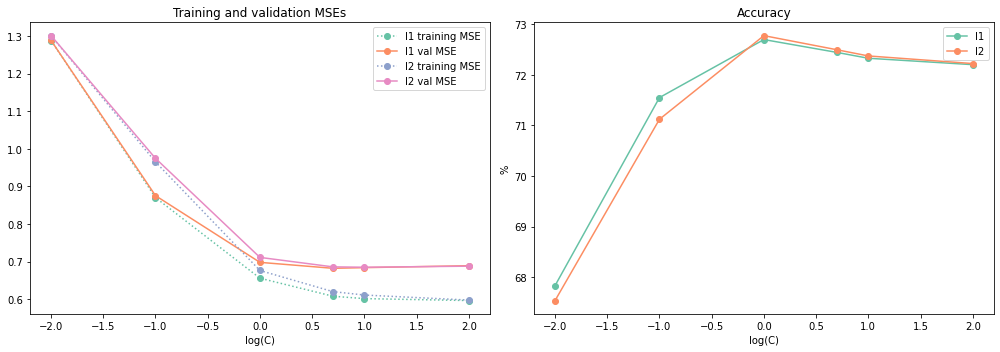

------------------------------
Best parameters for:  {'C': 5, 'Penalty': 'l1'}
Lowest validation MSE: 0.682


In [ ]:
c_list = [0.01, 0.1, 1, 5, 10, 100]
c_log = [math.log10(x) for x in c_list]
penalty_list = ["l1", "l2"]

best_params = {}
lowest_mse_val = 10.0

plt.figure(figsize=(14, 5))
for penalty in penalty_list:
    print("Penalty:", penalty)
    mse_train_list = []
    mse_val_list = []
    accuracy_list = []

    for c_value in c_list: 
        print("C:", c_value) 

        mse_train, mse_val, acc = cross_validation(X_train, y_train, 5, c_value, penalty, 
                                                   3, False)
    
        if mse_val < lowest_mse_val:
            best_params = {"C":c_value, "Penalty":penalty}
            lowest_mse_val = mse_val  # update the lowest val MSE

        mse_train_list.append(mse_train)
        mse_val_list.append(mse_val)
        accuracy_list.append(acc)
    
    # Make plots
    plt.subplot(1, 2, 1)
    plt.plot(c_log, mse_train_list, label=(penalty+" training MSE"), linestyle=":", marker="o")
    plt.plot(c_log, mse_val_list, label=(penalty+" val MSE"), marker="o")
    plt.xlabel("log(C)")
    plt.title("Training and validation MSEs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(c_log, accuracy_list, label=penalty, marker="o")
    plt.xlabel("log(C)")
    plt.ylabel("%")
    plt.title("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()
print("------------------------------")
print("Best parameters for: ", best_params)
print("Lowest validation MSE: %0.3f"%lowest_mse_val) 

**Test for logistic regression model**

In [28]:
tf1 = TfidfVectorizer(max_features=2000)
X_train_tfidf = tf1.fit_transform(X_train)
X_test_tfidf = tf1.transform(X_test)

time: 10.4 s (started: 2021-04-04 11:26:21 +00:00)


In [ ]:
pred_train, pred_test = ordinal_LogisticRegression(X_train_tfidf, y_train, 
                                                   X_test_tfidf, y_test, 
                                                   5, 5, "l1")
logreg_train_mse_tfidf = mean_squared_error(pred_train, y_train)
logreg_test_mse_tfidf = mean_squared_error(pred_test, y_test)
logreg_test_acc_tfidf = accuracy_score(pred_test, y_test)*100

print("Logistic Regression Model Training MSE: %0.3f"%logreg_train_mse_tfidf)
print("Logistic Regression Model Test MSE: %0.3f"%logreg_test_mse_tfidf)
print("Logistic Regression Model Test accuracy: %0.3f%%"%logreg_test_acc_tfidf)

Logistic Regression Model Training MSE: 0.625
Logistic Regression Model Test MSE: 0.701
Logistic Regression Model Test accuracy: 72.911%


## 3.1.9 Linear Regression

Reusing the datasets and defined variables in the section "Ordinal Logistic Regression".

### Cross-validated Ridge

In [29]:
ridge_model = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000], cv=5, 
                      scoring="neg_mean_squared_error")
ridge_model.fit(X_train_tfidf, y_train)
print("Alpha:", ridge_model.alpha_)

ridge_pred_tfidf_train = np.round(ridge_model.predict(X_train_tfidf))  
ridge_pred_tfidf_train = np.clip(ridge_pred_tfidf_train, 1.0, 5.0) # set bounds
ridge_mse_tfidf_train = mean_squared_error(ridge_pred_tfidf_train, y_train)
print("Ridge model training MSE after setting boundaries: %0.3f" % ridge_mse_tfidf_train)

ridge_pred_tfidf = np.round(ridge_model.predict(X_test_tfidf))
ridge_pred_tfidf = np.clip(ridge_pred_tfidf, 1.0, 5.0) # set bounds
ridge_mse_tfidf = mean_squared_error(ridge_pred_tfidf, y_test)
print("Ridge model validation MSE after setting boundaries: %0.3f" % ridge_mse_tfidf)

Alpha: 5.0
Ridge model training MSE after setting boundaries: 0.616
Ridge model validation MSE after setting boundaries: 0.654
time: 19.7 s (started: 2021-04-04 11:27:36 +00:00)


Visualization of validation results

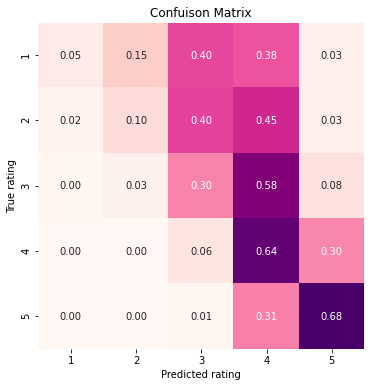

time: 188 ms (started: 2021-04-04 11:29:22 +00:00)


In [31]:
# Draw heatmap of the confusion matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, ridge_pred_tfidf, normalize='true'), 
                 annot=True, fmt="0.2f", cmap="RdPu", 
                 square=True, cbar=False, 
                 xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title("Confuison Matrix")
plt.ylabel("True rating")
plt.xlabel("Predicted rating")
plt.show()

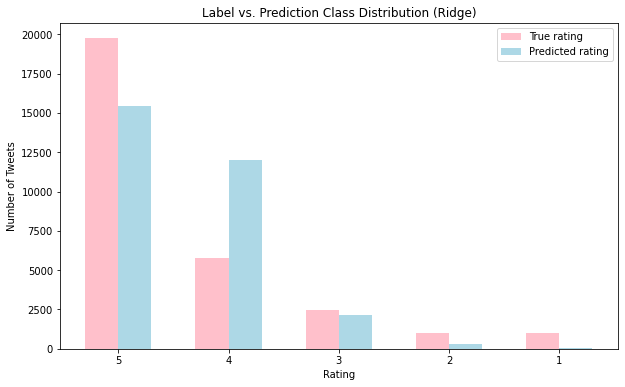

time: 837 ms (started: 2021-04-04 11:29:34 +00:00)


In [32]:
df_comparison = pd.DataFrame(ridge_pred_tfidf)
df_comparison["True rating"] = y_test
df_comparison.columns = ["Predicted rating", "True rating"]

plt.figure(figsize=(10, 6))
width = 1.5
index = np.arange(5)

true_2plot = df_comparison["True rating"].value_counts()
pred_2plot = df_comparison["Predicted rating"].value_counts()

plt.bar(index - width/10, true_2plot, label="True rating", width=width/5, color="pink")
plt.bar(index + width/10, pred_2plot, label="Predicted rating", width=width/5, color="lightblue")
plt.title("Label vs. Prediction Class Distribution (Ridge)")
plt.xticks(index, labels=["5", "4", "3", "2", "1"])
plt.xlabel("Rating")
plt.ylabel("Number of Tweets")
plt.legend()
plt.show()

### Cross-validated Lasso

In [ ]:
grid_lasso = {"alpha":[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]}
lasso = Lasso()
lasso_model = GridSearchCV(lasso, grid_lasso, cv=5, 
                           scoring="neg_mean_squared_error")
lasso_model.fit(X_train_tfidf, y_train)
print("Alpha: ", lasso_model.best_params_)

lasso_pred_tfidf_train = np.round(lasso_model.predict(X_train_tfidf))  
lasso_pred_tfidf_train = np.clip(lasso_pred_tfidf_train, 1.0, 5.0) # set bounds
lasso_mse_tfidf_train = mean_squared_error(lasso_pred_tfidf_train, y_train)
print("Lasso model training MSE after setting boundaries: %0.3f" % lasso_mse_tfidf_train)

lasso_pred_tfidf = np.round(lasso_model.predict(X_test_tfidf))
lasso_pred_tfidf = np.clip(lasso_pred_tfidf, 1.0, 5.0) # set bounds
lasso_mse_tfidf = mean_squared_error(lasso_pred_tfidf, y_test)
print("Lasso Model MSE: %0.3f"%lasso_mse_tfidf)

Alpha:  {'alpha': 0.001}
Lasso model training MSE after setting boundaries: 0.810
Lasso Model MSE: 0.835


### Test

In [45]:
df_test = pd.read_csv('test.csv')

time: 202 ms (started: 2021-04-04 11:37:13 +00:00)


In [46]:
df_test = df_test.drop(["image", "reviewHash"], axis = 1)
df_test['reviewTime'] = pd.to_datetime(df_test['reviewTime'])
df_test['reviewText'] = df_test['reviewText'].replace(np.nan,'no comment')
df_test['summary'] = df_test['summary'].replace(np.nan,'no comment')
stop = stopwords.words('english')

##### reviewText
# Remove all the punctuations
df_test['reviewText'] = df_test['reviewText'].str.replace('[^\w\s]','')

# Lowecase
df_test['reviewText'] = df_test['reviewText'].str.lower()

# Number
df_test['reviewText'] = df_test['reviewText'].str.replace('[0-9]','')

##### summary
# Remove all the punctuations
df_test['summary'] = df_test['summary'].str.replace('[^\w\s]','')

# Lowecase
df_test['summary'] = df_test['summary'].str.lower()

#firstly tokenize before dropping the stop word
df_test['reviewText']  = df_test['reviewText'].apply(word_tokenize)
#Remove stop words
df_test['reviewText']  = df_test['reviewText'].apply(lambda x: [word for word in x if word not in stop])
#lemmatizer
lemmatizer = WordNetLemmatizer() 
df_test['reviewText'] = df_test['reviewText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


#firstly tokenize before dropping the stop word
df_test['summary']  = df_test['summary'].apply(word_tokenize)
#Remove stop words
df_test['summary']  = df_test['summary'].apply(lambda x: [word for word in x if word not in stop])
df_test['summary'] = df_test['summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Fill na with "no comment"
df_test['summary'] = df_test['summary'].fillna('no comment')

time: 26.2 s (started: 2021-04-04 11:37:15 +00:00)


In [49]:
df_test["reviewText"] = df_test["reviewText"].str.join(" ")
df_test["summary"] = df_test["summary"].str.join(" ")
df_test["Texts"] = df_test["reviewText"] + " " + df_test["summary"] 
df_test.head()

,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,Texts
0,2017-02-11,u04140621,ok,five star,1486771200,Pop,$31.20,p65721979,ok five star
1,2018-01-29,u74766187,set alone worth purchase cost everything else gravy,buy 1955 set monk,1517184000,Jazz,$34.04,p87809670,set alone worth purchase cost everything else gravy buy 1955 set monk
2,2005-08-29,u31689638,mary j blige someone people know first appeared classic debut whats mary combined gritty soul hip hop beat flowed effortlessly voice almost seemed born sing song say puffy hell job followup life think puffy lazy sampling aint neccesary anyways back mary everyone pretty much know half cd got much radio play sexy reminisce funky real lovejazzy love limit remind chaka rufus remake sweet thing standouts love anything also good track basically every song excellent mary put heart signature street swagger sweet singing,mary excellent debut classic,1125273600,Pop,$1.72,p52702240,mary j blige someone people know first appeared classic debut whats mary combined gritty soul hip hop beat flowed effortlessly voice almost seemed born sing song say puffy hell job followup life think puffy lazy sampling aint neccesary anyways back mary everyone pretty much know half cd got much radio play sexy reminisce funky real lovejazzy love limit remind chaka rufus remake sweet thing standouts love anything also good track basically every song excellent mary put heart signature street swagger sweet singing mary excellent debut classic
3,2015-11-02,u35613516,good satch album,four star,1446422400,Pop,$10.99,p01314374,good satch album four star
4,2012-01-03,u93320378,well hundred christmas anthology one best ever mix classic song obscure tune rock hit favorite recognize make say great mix big one dont go get many compilation good bang buck,cd life name,1325548800,Alternative Rock,$7.98,p84396269,well hundred christmas anthology one best ever mix classic song obscure tune rock hit favorite recognize make say great mix big one dont go get many compilation good bang buck cd life name


time: 186 ms (started: 2021-04-04 11:40:58 +00:00)


In [50]:
X_train_fin = df_train["Texts"] 
y_train_fin = df_train["overall"]
X_test_fin = df_test["Texts"]

time: 2.03 ms (started: 2021-04-04 11:41:06 +00:00)


In [51]:
tf_fin = TfidfVectorizer(max_features=2000)
X_train_tfidf_fin = tf_fin.fit_transform(X_train_fin)
X_test_tfidf_fin = tf_fin.transform(X_test_fin)

time: 12 s (started: 2021-04-04 11:41:07 +00:00)


In [52]:
ridge_fin = Ridge(alpha=5.0)
ridge_fin.fit(X_train_tfidf_fin, y_train_fin)

ridge_pred_train = np.round(ridge_fin.predict(X_train_tfidf_fin))
ridge_pred_train = np.clip(ridge_pred_train, 1.0, 5.0) 

ridge_pred_test = np.round(ridge_fin.predict(X_test_tfidf_fin))
ridge_pred_test = np.clip(ridge_pred_test, 1.0, 5.0)

ridge_train_mse_tfidf = mean_squared_error(ridge_pred_train, y_train_fin)
ridge_train_acc_tfidf = accuracy_score(ridge_pred_train, y_train_fin)*100

print("Ridge Model Training MSE: %0.3f" % ridge_train_mse_tfidf)
print("Ridge Model Training accuracy: %0.3f%%" % ridge_train_acc_tfidf)

Ridge Model Training MSE: 0.620
Ridge Model Training accuracy: 61.065%
time: 702 ms (started: 2021-04-04 11:41:20 +00:00)


In [53]:
rating_pairs_ridge = pd.read_csv("rating_pairs.csv")
rating_pairs_ridge

,userID-itemID,prediction
0,u04140621-p65721979,NaN
1,u74766187-p87809670,NaN
2,u31689638-p52702240,NaN
3,u35613516-p01314374,NaN
4,u93320378-p84396269,NaN
...,...,...
19995,u16765812-p17291597,NaN
19996,u04428712-p73630774,NaN
19997,u39251384-p58275451,NaN
19998,u05089888-p13155723,NaN


time: 35.9 ms (started: 2021-04-04 11:41:24 +00:00)


In [54]:
rating_pairs_ridge["prediction"] = ridge_pred_test
rating_pairs_ridge["prediction"].value_counts()

5.0    10343
4.0     7911
3.0     1431
2.0      263
1.0       52
Name: prediction, dtype: int64

time: 13 ms (started: 2021-04-04 11:41:27 +00:00)


In [55]:
# rating_pairs_ridge.to_csv("rating_pairs_ridge.csv", index=False)
rating_pairs_ridge

,userID-itemID,prediction
0,u04140621-p65721979,4.0
1,u74766187-p87809670,5.0
2,u31689638-p52702240,5.0
3,u35613516-p01314374,4.0
4,u93320378-p84396269,5.0
...,...,...
19995,u16765812-p17291597,5.0
19996,u04428712-p73630774,4.0
19997,u39251384-p58275451,5.0
19998,u05089888-p13155723,5.0


time: 15.9 ms (started: 2021-04-04 11:41:29 +00:00)
